# Proyecto analisis de Precios de Viviendas

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Cargar el dataset
data = pd.read_csv('data/train.csv')

# Vista inicial
print("Primeras 5 filas del dataset:")
print(data.head())

Primeras 5 filas del dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sal

In [21]:
#Información del dataset
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [22]:
# Estadísticas del dataset
print("\nDimensiones del dataset:", data.shape)


Dimensiones del dataset: (1460, 81)


Observamos que hay muchas caracteristicas de las casas pero analizaremos cuales tiene mayor peso en el precio.

In [23]:
# Ver valores faltantes
print("\nValores faltantes por columna (top 10):")
print(data.isnull().sum().sort_values(ascending=False).head(10))


Valores faltantes por columna (top 10):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


Hay algunos datos faltante como PoolQc que se deba a que la mayoria de casas no cuentan con alberca

In [2]:
# Seleccionar columnas clave para el análisis 
columns_of_interest = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
data_subset = data[columns_of_interest]

In [3]:
# Verificar valores nulos en el subconjunto
print("\nValores nulos en el subconjunto:")
print(data_subset.isnull().sum())
# Resumen estadístico
print("\nResumen estadístico:")
print(data_subset.describe())


Valores nulos en el subconjunto:
SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

Resumen estadístico:
           SalePrice  OverallQual    GrLivArea   GarageCars  TotalBsmtSF  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890     6.099315  1515.463699     1.767123  1057.429452   
std     79442.502883     1.382997   525.480383     0.747315   438.705324   
min     34900.000000     1.000000   334.000000     0.000000     0.000000   
25%    129975.000000     5.000000  1129.500000     1.000000   795.750000   
50%    163000.000000     6.000000  1464.000000     2.000000   991.500000   
75%    214000.000000     7.000000  1776.750000     2.000000  1298.250000   
max    755000.000000    10.000000  5642.000000     4.000000  6110.000000   

          FullBath    YearBuilt  
count  1460.000000  1460.000000  
mean      1.565068  1971.267808  
std       0.550916    30.

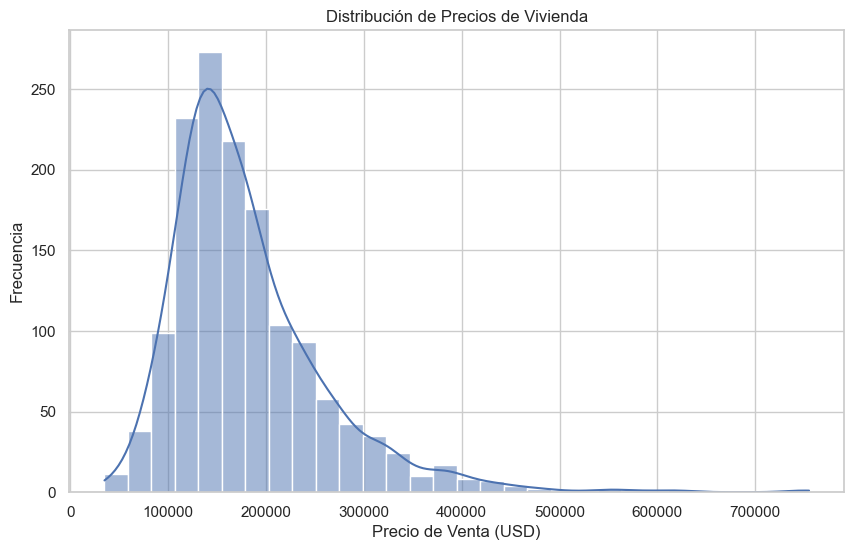

In [4]:
# Histograma de SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data_subset['SalePrice'], bins=30, kde=True)
plt.title('Distribución de Precios de Vivienda')
plt.xlabel('Precio de Venta (USD)')
plt.ylabel('Frecuencia')
plt.show()

Vemos que la mediana esta aproximadamente en 150,000, para hacer esta distribucion normal podriamos eleminar alguno valores atipicos.

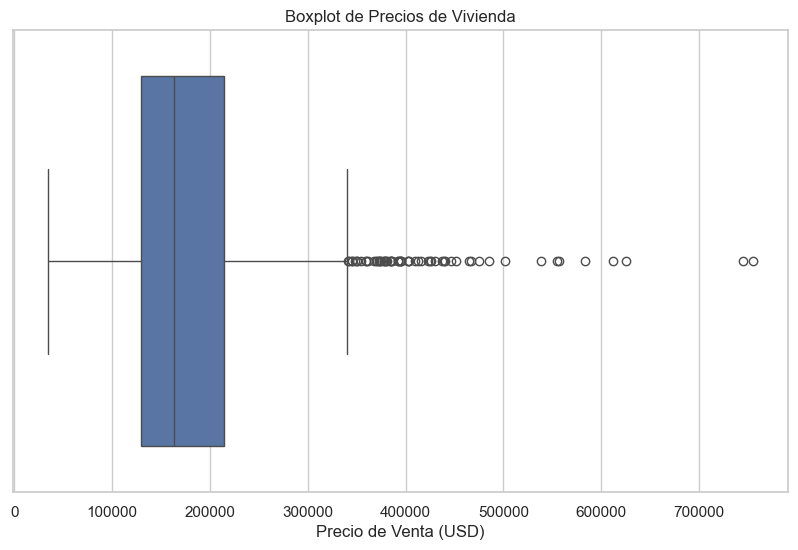

In [27]:
# Boxplot de SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_subset['SalePrice'])
plt.title('Boxplot de Precios de Vivienda')
plt.xlabel('Precio de Venta (USD)')
plt.show()

Observamos una distribucion sesgada a la derecha ya que hay muchas casas con bajo precio y pocas casas con un precio alto 

Con el boxplot podemos observar outliners y que tan alejado esta de los demas datos

### Relacion entre saleprice y otras variables

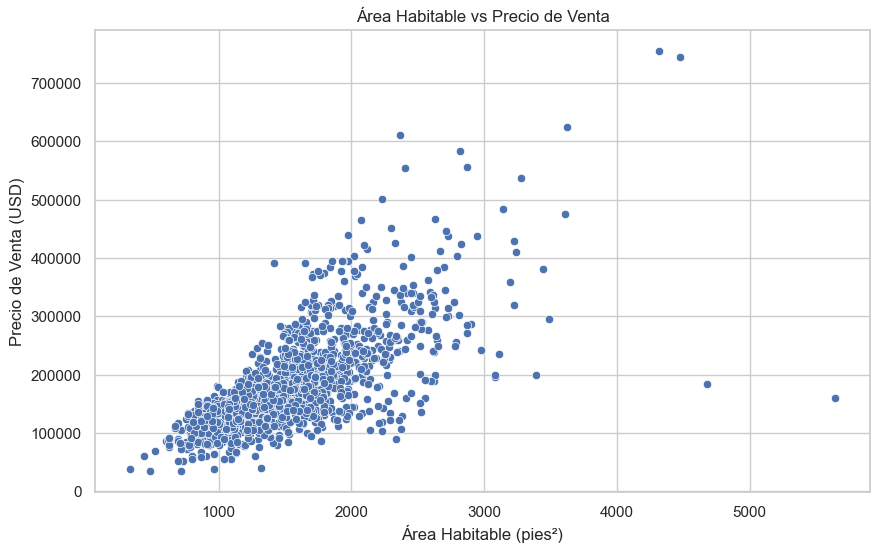

In [30]:
# Scatter plot: Área habitable vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_subset)
plt.title('Área Habitable vs Precio de Venta')
plt.xlabel('Área Habitable (pies²)')
plt.ylabel('Precio de Venta (USD)')
plt.show()

Podemos observar que a mayor area el precio se eleva aunque hay algunos datos con area grande y el precio no se eleva esto se pueda deber a que el precio esta afectado por otras variables tal vez como la antiguedad, la distancia que tiene hacia el centro de la ciudad o la construccion que tiene 

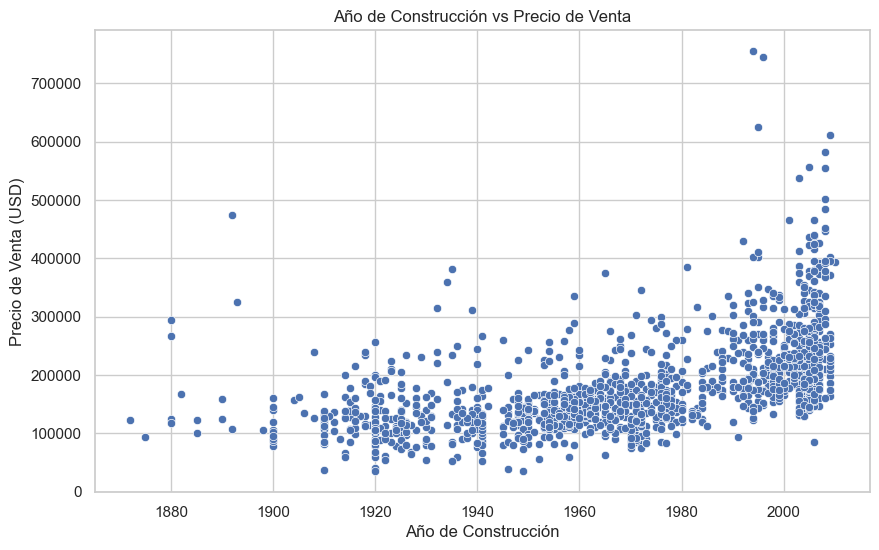

In [31]:
# Scatter plot: Año de construcción vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data_subset)
plt.title('Año de Construcción vs Precio de Venta')
plt.xlabel('Año de Construcción')
plt.ylabel('Precio de Venta (USD)')
plt.show()

Observamos que se mantuvieron los precios relativamente igual entre los años 1900 y 2000 pero con las casas mas nuevas se empezo a elevar el precio de estas

### Relación con variables categóricas

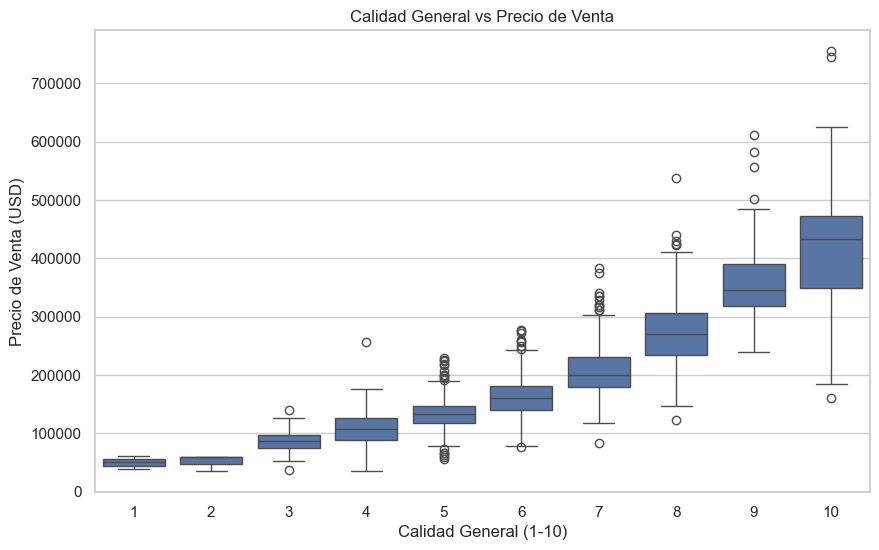

In [33]:
# Boxplot: Calidad general vs Precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data_subset)
plt.title('Calidad General vs Precio de Venta')
plt.xlabel('Calidad General (1-10)')
plt.ylabel('Precio de Venta (USD)')
plt.show()

La calidad tiene un fuerte peso en el precio de las casas 

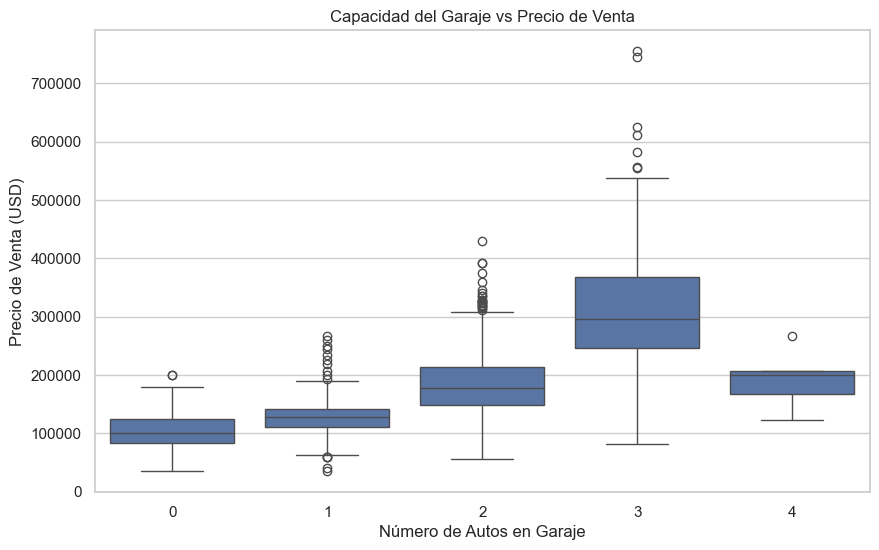

In [34]:
# Boxplot: Número de autos en garaje vs Precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=data_subset)
plt.title('Capacidad del Garaje vs Precio de Venta')
plt.xlabel('Número de Autos en Garaje')
plt.ylabel('Precio de Venta (USD)')
plt.show()

Observamos que en las casa que tiene capacidad para 3 coches hay algunos que el precio se eleva mucho, podria ser por un tipo especial de garage

### Matriz de correlación

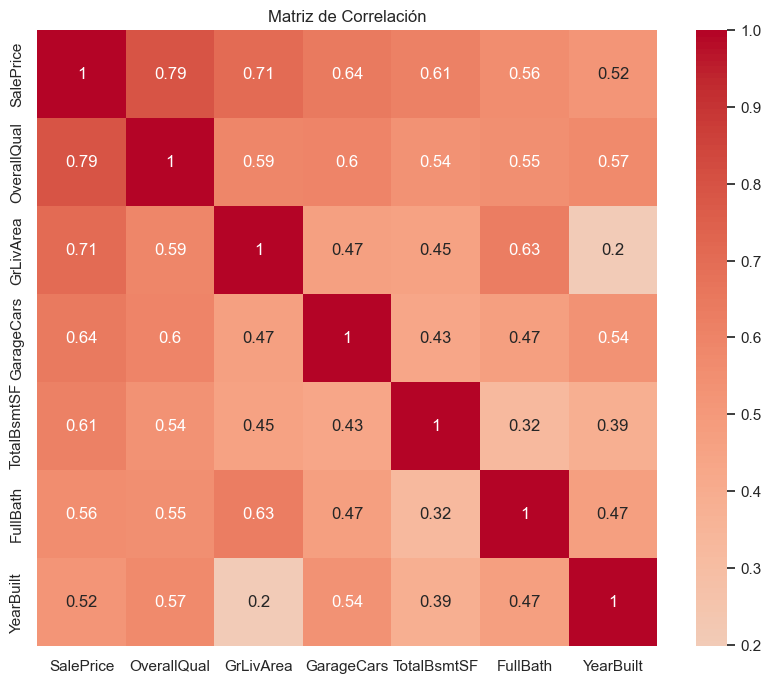

In [35]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data_subset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que para el precio la calidad es la variable que mas afecta el precio y la que menos tiene peso es el año de construccion 